<a href="https://colab.research.google.com/github/waqqasansari/Machine_Learning_Probs/blob/master/hackerearth_novartis(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd 
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn

In [60]:
train_data = pd.read_csv('Train.csv')
Y = train_data.MULTIPLE_OFFENSE
test_data = pd.read_csv('Test.csv')

print("The shape of training data is ->>", train_data.shape)
print("The shape of training data is ->>", test_data.shape)

The shape of training data is ->> (23856, 18)
The shape of training data is ->> (15903, 17)


In [5]:
train_data.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [6]:
test_data.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [7]:
# Number of NaNs for each object
train_data.isnull().sum(axis=1).head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [9]:
# Number of NaNs for each column
test_data.isnull().sum(axis=0).head(15)

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
dtype: int64

##Dataset Cleaning

In [10]:
traintest = pd.concat([train_data, test_data], axis = 0)

In [11]:
# `dropna = False` makes nunique treat NaNs as a distinct value
feats_counts = train_data.nunique(dropna = False)

In [17]:
feats_counts.sort_values()[:18]

MULTIPLE_OFFENSE        2
X_5                     5
X_9                     7
X_1                     8
X_4                    10
X_6                    19
X_7                    19
X_8                    24
X_10                   24
X_12                   24
X_15                   28
X_2                    52
X_3                    52
X_13                   60
X_14                   62
X_11                  133
DATE                 9121
INCIDENT_ID         23856
dtype: int64

We have not found any constant columns

#Remove duplicated features

In [14]:
# Fill NaNs with something we can find later if needed.
traintest.fillna('NaN', inplace=True)

In [19]:
train_enc =  pd.DataFrame(index = train_data.index)

for col in tqdm_notebook(traintest.columns):
    train_enc[col] = train_data[col].factorize()[0]

In [20]:
dup_cols = {}

for i, c1 in enumerate(tqdm_notebook(train_enc.columns)):
    for c2 in train_enc.columns[i + 1:]:
        if c2 not in dup_cols and np.all(train_enc[c1] == train_enc[c2]):
            dup_cols[c2] = c1

In [21]:
dup_cols

{'X_3': 'X_2', 'X_7': 'X_6'}

In [24]:
import pickle
pickle_out = open("dup_cols","wb")
pickle.dump(dup_cols, pickle_out)
pickle_out.close()

In [25]:
traintest.drop(dup_cols.keys(), axis = 1,inplace=True)

#Determine types
Let's examine the number of unique values.

In [27]:
nunique = train_data.nunique(dropna=False)
nunique

INCIDENT_ID         23856
DATE                 9121
X_1                     8
X_2                    52
X_3                    52
X_4                    10
X_5                     5
X_6                    19
X_7                    19
X_8                    24
X_9                     7
X_10                   24
X_11                  133
X_12                   24
X_13                   60
X_14                   62
X_15                   28
MULTIPLE_OFFENSE        2
dtype: int64

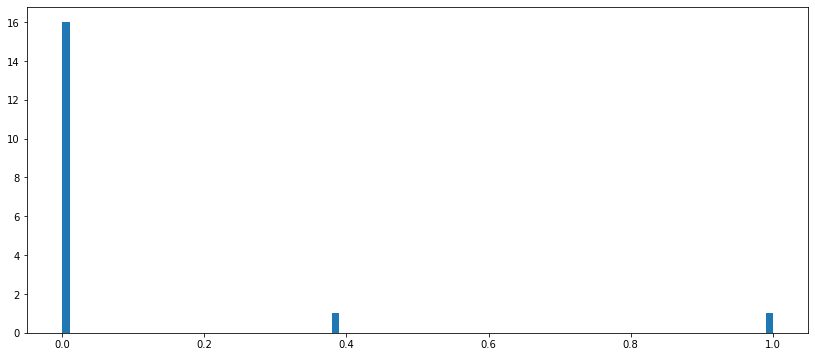

In [29]:
plt.figure(figsize=(14,6))
_ = plt.hist(nunique.astype(float)/train_data.shape[0], bins=100)

In [45]:
mask = (nunique.astype(float)/train_data.shape[0] < 0.4) & (nunique.astype(float)/train_data.shape[0] > 0.3)
train_data.loc[:25, mask]

,DATE
0,04-JUL-04
1,18-JUL-17
2,15-MAR-17
3,13-FEB-09
4,13-APR-05
5,07-APR-03
6,22-JAN-08
7,14-MAY-93
8,21-AUG-16
9,25-AUG-96


In [47]:
train_data['X_2'].value_counts()

4     4029
36    2232
33    2174
24    1344
21    1254
37     962
49     927
45     908
3      778
22     672
47     641
16     631
9      593
39     513
25     499
5      437
6      434
44     428
40     385
19     370
26     356
30     266
42     238
17     238
18     210
35     186
46     181
7      166
38     164
50     160
15     136
23     122
2      116
11     107
8      104
51     103
29      99
41      93
14      84
28      78
32      69
43      69
34      56
48      55
20      54
31      43
27      23
0       22
1       20
52      19
13       6
10       2
Name: X_2, dtype: int64

In [48]:
cat_cols = list(train_data.select_dtypes(include=['object']).columns)
num_cols = list(train_data.select_dtypes(exclude=['object']).columns)

In [49]:
print(cat_cols)
print(num_cols)

['INCIDENT_ID', 'DATE']
['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'MULTIPLE_OFFENSE']


In [68]:
def autolabel(arrayA):
    ''' label each colored square with the corresponding data value. 
    If value > 20, the text is in black, else in white.
    '''
    arrayA = np.array(arrayA)
    for i in range(arrayA.shape[0]):
        for j in range(arrayA.shape[1]):
                plt.text(j,i, "%.2f"%arrayA[i,j], ha='center', va='bottom',color='w')

def hist_it(feat):
    plt.figure(figsize=(16,4))
    feat[Y==0].hist(bins=range(int(feat.min()),int(feat.max()+2)),normed=True,alpha=0.8)
    feat[Y==1].hist(bins=range(int(feat.min()),int(feat.max()+2)),normed=True,alpha=0.5)
    plt.ylim((0,1))
    
def gt_matrix(feats,sz=12):
    a = []
    for i,c1 in enumerate(feats):
        b = [] 
        for j,c2 in enumerate(feats):
            mask = (~train_data[c1].isnull()) & (~train_data[c2].isnull())
            if i>=j:
                b.append((train_data.loc[mask,c1].values>=train_data.loc[mask,c2].values).mean())
            else:
                b.append((train_data.loc[mask,c1].values>train_data.loc[mask,c2].values).mean())

        a.append(b)

    plt.figure(figsize = (sz,sz))
    plt.imshow(a, interpolation = 'None')
    _ = plt.xticks(range(len(feats)),feats,rotation = 90)
    _ = plt.yticks(range(len(feats)),feats,rotation = 0)
    autolabel(a)

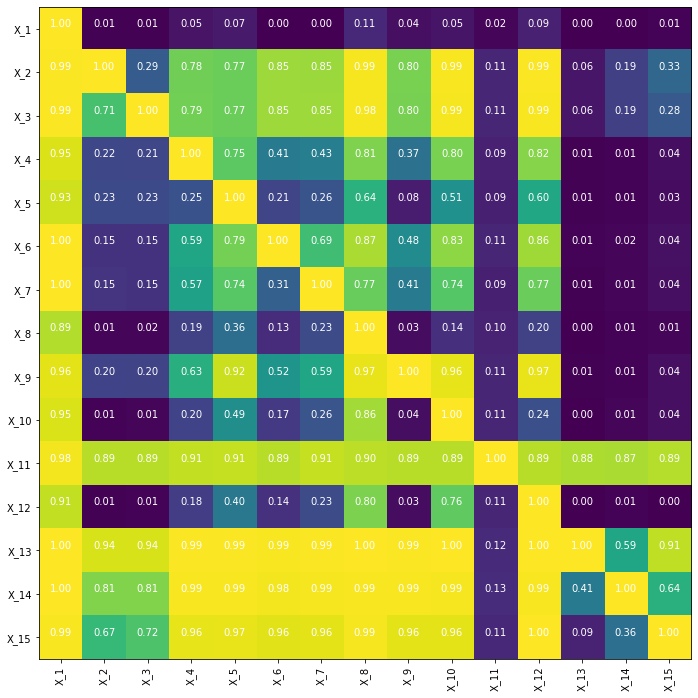

In [57]:
# select first 15 numeric features
feats = num_cols[:15]

# build 'mean(feat1 > feat2)' plot
gt_matrix(feats,12)

AttributeError: ignored

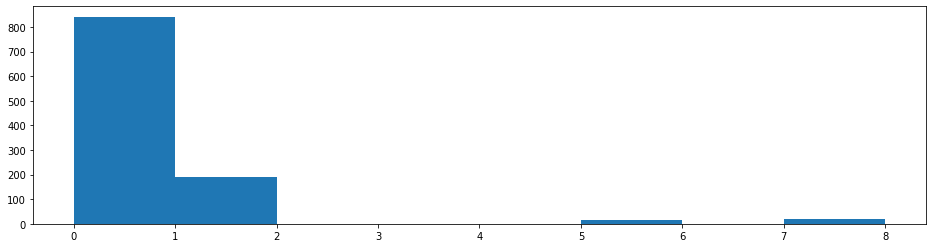

In [69]:
hist_it(train_data['X_1'])
plt.ylim((0,0.05))
plt.xlim((-10,1010))

In [70]:
train_data['X_1'].value_counts()

0    19036
1     3497
7      876
5      270
3      136
4       26
2       10
6        5
Name: X_1, dtype: int64

In [71]:
train_data.loc[:,cat_cols].head().T

,0,1,2,3,4
INCIDENT_ID,CR_102659,CR_189752,CR_184637,CR_139071,CR_109335
DATE,04-JUL-04,18-JUL-17,15-MAR-17,13-FEB-09,13-APR-05
